In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import string
import names
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action ='ignore', category = SettingWithCopyWarning)

In [2]:
#os.chdir('/Users/ekaterinagalin/Documents/Python/DataCamp')
path = os.getcwd()
path

'/Users/ekaterinagalin/Documents/Python/Data Camp'

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()
df_copy = df.copy()
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df_copy = df_copy[['InvoiceDate', 'Quantity', 'UnitPrice', 'CustomerID', 'InvoiceNo']]
df_copy.head()

,InvoiceDate,Quantity,UnitPrice,CustomerID,InvoiceNo
0,2010-12-01 08:26:00,6,2.55,17850.0,536365
1,2010-12-01 08:26:00,6,3.39,17850.0,536365
2,2010-12-01 08:26:00,8,2.75,17850.0,536365
3,2010-12-01 08:26:00,6,3.39,17850.0,536365
4,2010-12-01 08:26:00,6,3.39,17850.0,536365


In [5]:
df_copy.isna().sum()

InvoiceDate         0
Quantity            0
UnitPrice           0
CustomerID     135080
InvoiceNo           0
dtype: int64

In [6]:
df1 = df_copy.dropna()
df1.isna().sum()

InvoiceDate    0
Quantity       0
UnitPrice      0
CustomerID     0
InvoiceNo      0
dtype: int64

In [7]:
df1.dtypes

InvoiceDate    datetime64[ns]
Quantity                int64
UnitPrice             float64
CustomerID            float64
InvoiceNo              object
dtype: object

# Cohort Analysis

In [9]:
#create invoice month column out of InvoiceDate column
#create function that will parse the date
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df1['InvoiceMonth'] = df1['InvoiceDate'].apply(get_month)
df1.head(5)

,InvoiceDate,Quantity,UnitPrice,CustomerID,InvoiceNo,InvoiceMonth
0,2010-12-01 08:26:00,6,2.55,17850.0,536365,2010-12-01
1,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01
2,2010-12-01 08:26:00,8,2.75,17850.0,536365,2010-12-01
3,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01
4,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01


In [10]:
#create CohortMonth: first month for the specific user ID when the user shopped
df1['CohortMonth'] = df1.groupby('CustomerID')['InvoiceMonth'].transform('min')
df1.head(40)

,InvoiceDate,Quantity,UnitPrice,CustomerID,InvoiceNo,InvoiceMonth,CohortMonth
0,2010-12-01 08:26:00,6,2.55,17850.0,536365,2010-12-01,2010-12-01
1,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01
2,2010-12-01 08:26:00,8,2.75,17850.0,536365,2010-12-01,2010-12-01
3,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01
4,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01
5,2010-12-01 08:26:00,2,7.65,17850.0,536365,2010-12-01,2010-12-01
6,2010-12-01 08:26:00,6,4.25,17850.0,536365,2010-12-01,2010-12-01
7,2010-12-01 08:28:00,6,1.85,17850.0,536366,2010-12-01,2010-12-01
8,2010-12-01 08:28:00,6,1.85,17850.0,536366,2010-12-01,2010-12-01
9,2010-12-01 08:34:00,32,1.69,13047.0,536367,2010-12-01,2010-12-01


In [11]:
#create CohortIndex: month difference between InvoiceMonth & CohortMonth to identify how many months after registration a user made a purcahse
def get_date_int (df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

#get integers
invoice_year, invoice_month, _ = get_date_int(df1, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df1, 'CohortMonth')

#find the difference between the transaction and the first transaction
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df1['CohortIndex'] = year_diff * 12 + month_diff + 1
df1.head()

,InvoiceDate,Quantity,UnitPrice,CustomerID,InvoiceNo,InvoiceMonth,CohortMonth,CohortIndex
0,2010-12-01 08:26:00,6,2.55,17850.0,536365,2010-12-01,2010-12-01,1
1,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01,1
2,2010-12-01 08:26:00,8,2.75,17850.0,536365,2010-12-01,2010-12-01,1
3,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01,1
4,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01,1


In [301]:
#Metric1: create pivot table by number of customers
grouping = df1.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index() #to be able to access the columns stored as indeces
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                 columns = 'CohortIndex',
                                 values = 'CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
#transform numbers into percent of returning customers
#get the first column of the table which is the cohort size
cohort_size = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_size, axis = 0) # axis = 0 ensures that we divide along the row axis
retention.round(3) * 100
churn = 1 -retention
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


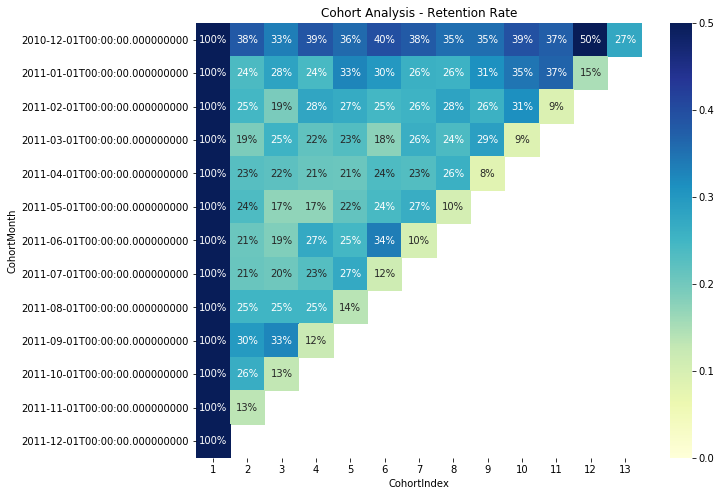

In [303]:
#visualisation
plt.figure(figsize = (10,8))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap (data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'YlGnBu')
plt.show()

In [304]:
#Metric2: create pivot table by number of purchases
grouping = df1.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index() #to be able to access the columns stored as indeces
cohort_counts1 = cohort_data.pivot(index = 'CohortMonth',
                                 columns = 'CohortIndex',
                                 values = 'Quantity')
cohort_counts1

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,144.0,104.0,97.0,108.0,97.0,108.0,123.0,120.0,149.0,161.0,163.0,161.0,104.0
2011-01-01,90.0,61.0,63.0,64.0,61.0,71.0,66.0,66.0,61.0,75.0,77.0,53.0,NaN
2011-02-01,71.0,52.0,58.0,48.0,55.0,57.0,54.0,64.0,59.0,60.0,33.0,NaN,NaN
2011-03-01,72.0,53.0,55.0,47.0,60.0,54.0,57.0,65.0,69.0,41.0,NaN,NaN,NaN
2011-04-01,66.0,39.0,38.0,37.0,37.0,48.0,48.0,47.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,62.0,44.0,40.0,36.0,38.0,39.0,50.0,33.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,63.0,49.0,33.0,58.0,50.0,54.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,55.0,39.0,33.0,36.0,34.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,54.0,45.0,43.0,60.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
#transform numbers into percent of returning customers
#get the first column of the table which is the cohort size
cohort_size1 = cohort_counts1.iloc[:,0]

avg_quantity = cohort_counts1.divide(cohort_size1, axis = 0) # axis = 0 ensures that we divide along the row axis
avg_quantity.round(3) * 100
avg_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.722222,0.673611,0.750000,0.673611,0.750000,0.854167,0.833333,1.034722,1.118056,1.131944,1.118056,0.722222
2011-01-01,1.0,0.677778,0.700000,0.711111,0.677778,0.788889,0.733333,0.733333,0.677778,0.833333,0.855556,0.588889,NaN
2011-02-01,1.0,0.732394,0.816901,0.676056,0.774648,0.802817,0.760563,0.901408,0.830986,0.845070,0.464789,NaN,NaN
2011-03-01,1.0,0.736111,0.763889,0.652778,0.833333,0.750000,0.791667,0.902778,0.958333,0.569444,NaN,NaN,NaN
2011-04-01,1.0,0.590909,0.575758,0.560606,0.560606,0.727273,0.727273,0.712121,0.378788,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.709677,0.645161,0.580645,0.612903,0.629032,0.806452,0.532258,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.777778,0.523810,0.920635,0.793651,0.857143,0.539683,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.709091,0.600000,0.654545,0.618182,0.418182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.833333,0.796296,1.111111,0.685185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


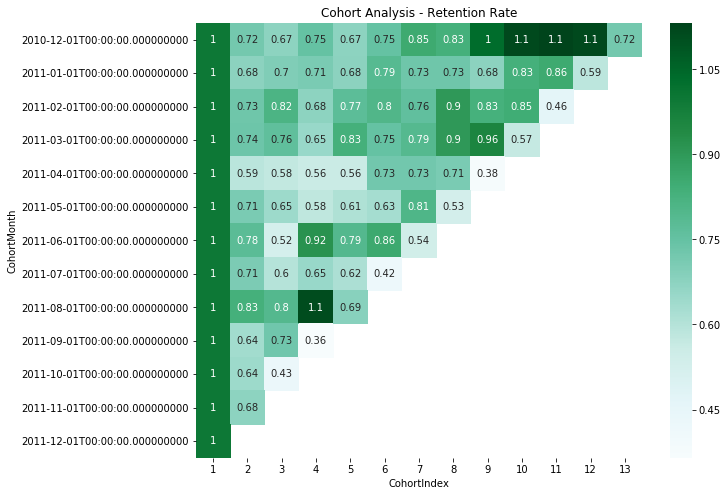

In [306]:
#visualisation

plt.figure(figsize = (10,8))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap (data = avg_quantity,
            annot = True,
            cmap = 'BuGn')
plt.show()

# RFM Analysis

In [307]:
#create TotralSum column:
df1['TotalSum'] = df1['Quantity'] * df1['UnitPrice']
df1.head()

,InvoiceDate,Quantity,UnitPrice,CustomerID,InvoiceNo,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,2010-12-01 08:26:00,6,2.55,17850.0,536365,2010-12-01,2010-12-01,1,15.30
1,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01,1,20.34
2,2010-12-01 08:26:00,8,2.75,17850.0,536365,2010-12-01,2010-12-01,1,22.00
3,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01,1,20.34
4,2010-12-01 08:26:00,6,3.39,17850.0,536365,2010-12-01,2010-12-01,1,20.34


In [308]:
#check that dataset contains only the latest 12 months of data

print ('Min:{}; Max:{}'.format(min(df1.InvoiceMonth),
                              max(df1.InvoiceMonth)))

Min:2010-12-01 00:00:00; Max:2011-12-01 00:00:00


In [309]:
#create a hypothetical snapshot_date as if we're doing analysis recently
import datetime as dt
snapshot_date = max(df1.InvoiceMonth) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-02 00:00:00')

In [310]:
#aggregate data and calculate Recency, Frequency & Value
datamart = df1.groupby(['CustomerID']).agg({
    
'InvoiceMonth': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'count',
'TotalSum': 'sum'})

#rename the columns
datamart.rename (columns = {'InvoiceMonth': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace = True)
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,335,2,0.00
12347.0,1,182,4310.00
12348.0,92,31,1797.24
12349.0,31,73,1757.55
12350.0,304,17,334.40


In [311]:
#create recency quartile
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)

#assign values to the R (Recency) column
datamart = datamart.assign (R = r_quartiles.values)

In [312]:
#create frequency quartile
f_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)

#assign values to the R (Recency) column
datamart = datamart.assign (F = f_quartiles.values)

In [313]:
#create value quartile
m_labels = range(1,5)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)

#assign values to the R (Recency) column
datamart = datamart.assign (M = m_quartiles.values)

In [314]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,335,2,0.00,1,1,1
12347.0,1,182,4310.00,4,4,4
12348.0,92,31,1797.24,2,2,4
12349.0,31,73,1757.55,4,3,4
12350.0,304,17,334.40,1,1,2


In [315]:
#create RFM segment (concatinated string of RFM values)
#create RFM Score which is sum of RFM values
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM Segment'] = datamart.apply(join_rfm, axis = 1)
datamart['RFM Score'] = datamart[['R', 'F', 'M']].sum(axis =1)

In [316]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM Segment,RFM Score
CustomerID,,,,,,,,
12346.0,335,2,0.00,1,1,1,111,3.0
12347.0,1,182,4310.00,4,4,4,444,12.0
12348.0,92,31,1797.24,2,2,4,224,8.0
12349.0,31,73,1757.55,4,3,4,434,11.0
12350.0,304,17,334.40,1,1,2,112,4.0


In [317]:
datamart.groupby('RFM Segment').size().sort_values(ascending = False)[:10]

RFM Segment
444    639
111    366
433    299
122    187
422    175
411    157
443    156
211    141
222    135
434    125
dtype: int64

In [318]:
#summary metrics per RFM Score
datamart.groupby ('RFM Score').agg ({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM Score                                      
3.0         278.3       7.8         124.8   366
4.0         203.8      14.0         212.3   333
5.0         181.7      21.2         353.4   439
6.0         101.7      24.0         437.5   483
7.0          93.0      36.4         642.7   398
8.0          69.4      48.3         863.1   497
9.0          56.5      69.1        1201.7   369
10.0         37.4      90.6        1483.6   475
11.0         31.5     144.8        2562.9   373
12.0         15.4     340.2        7869.1   639

In [319]:
#group into named segments
def segment_me(df):
        if df['RFM Score'] >=9:
            return 'Gold'
        elif (df['RFM Score'] >= 5) and (df['RFM Score'] <9):
            return 'Silver'
        else:
            return 'Bronze'

datamart['General Segment'] = datamart.apply(segment_me, axis = 1)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM Segment,RFM Score,General Segment
CustomerID,,,,,,,,,
12346.0,335,2,0.00,1,1,1,111,3.0,Bronze
12347.0,1,182,4310.00,4,4,4,444,12.0,Gold
12348.0,92,31,1797.24,2,2,4,224,8.0,Silver
12349.0,31,73,1757.55,4,3,4,434,11.0,Gold
12350.0,304,17,334.40,1,1,2,112,4.0,Bronze


In [320]:
datamart.groupby ('General Segment').agg ({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] #size of each segment
}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General Segment                                      
Bronze            242.8      10.8         166.5   699
Gold               32.4     183.1        3842.9  1856
Silver            110.3      32.7         578.5  1817

# k-means clustering

In [321]:
#data preprocessing
datamart_rfm = df1.groupby(['CustomerID']).agg({
    
'InvoiceMonth': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'count',
'TotalSum': 'sum'})

#rename the columns
datamart_rfm.rename (columns = {'InvoiceMonth': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace = True)
datamart_rfm.head()
datamart_rfm['Recency'].value_counts()

31     1268
1       686
62      647
92      395
123     216
154     183
184     182
276     165
215     161
245     137
366     128
304     107
335      97
Name: Recency, dtype: int64

In [322]:
datamart_rfm_copy = datamart_rfm.copy()
datamart_rfm_copy.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,335,2,0.00
12347.0,1,182,4310.00
12348.0,92,31,1797.24
12349.0,31,73,1757.55
12350.0,304,17,334.40


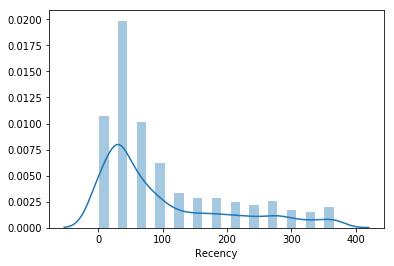

In [323]:
#deal with skewness
#plot Recency distribution
sns.distplot(datamart_rfm_copy['Recency'])
plt.show();
#it is skewed

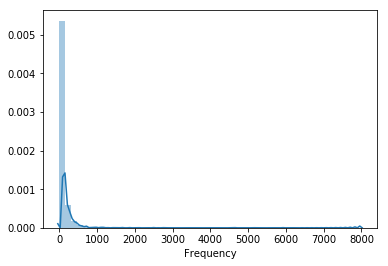

In [324]:
sns.distplot(datamart_rfm_copy['Frequency'])
plt.show();

In [325]:
#dealing with skewed distributions - apply log transformation (values should be positive)
c = 1
datamart_rfm_copy['MonetaryValue'] = datamart_rfm_copy['MonetaryValue'].apply(lambda x: np.log(c + x))
datamart_rfm_copy['Recency'] = datamart_rfm_copy['Recency'].apply(lambda x: np.log(c + x))
datamart_rfm_copy['Frequency'] = datamart_rfm_copy['Frequency'].apply(lambda x: np.log(c + x))

In [326]:
#combine centering & scaling (dividing by standard deviation)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm_copy)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [327]:
#store it separately
datamart_normalised = scaler.transform(datamart_rfm_copy)
datamart_normalised = pd.DataFrame(data = datamart_normalised, index = datamart_rfm.index, columns = datamart_rfm.columns)

In [328]:
datamart_normalised.describe()

,Recency,Frequency,MonetaryValue
count,4.372000e+03,4.372000e+03,4.331000e+03
mean,5.402243e-16,1.811604e-16,-3.452689e-16
std,1.000114e+00,1.000114e+00,1.000115e+00
min,-2.010627e+00,-2.415174e+00,-5.053011e+00
25%,-2.322298e-01,-6.749465e-01,-6.489728e-01
50%,2.022682e-01,1.475990e-02,-4.845786e-02
75%,7.797336e-01,7.066051e-01,6.493186e-01
max,1.332598e+00,4.152226e+00,4.619383e+00


In [329]:
#methods to define the number of clusters
#elbow criteria
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 1)

In [330]:
datamart_normalised = np.nan_to_num(datamart_normalised)
kmeans.fit(datamart_normalised)
cluster_labels = kmeans.labels_

In [331]:
#create a cluster label column in the original dataset
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)

In [332]:
#calculate average RFM values and size for each cluster
datamart_rfm_k2.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        177.38     10.55        207.46  1117
1          1.00    233.45       5712.03   666
2         55.47    175.28       3264.71   977
3        109.98     42.38        666.56  1612

In [333]:
#choosing the number of clusters (elbow)
sse = {} #sum of squared errors
#run a for-loop for a different number of clusters (1-10)
for k in range (1, 11):
    kmeans = KMeans (n_clusters = k, random_state = 1)
    kmeans.fit(datamart_normalised)
    sse[k] = kmeans.inertia_ #sum of squared errors

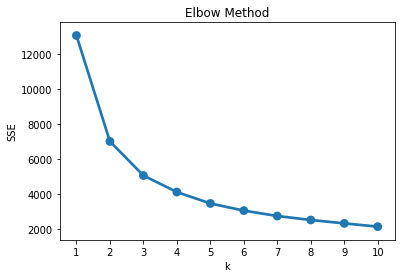

In [334]:
#plot SSE for eack *k
plt.title ('Elbow Method')
plt.xlabel ('k'); plt.ylabel ('SSE')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

In [335]:
#create a cluster label column in the original dataset
datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)

In [336]:
#calculate average RFM values and size for each cluster
datamart_rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        177.38     10.55        207.46  1117
1          1.00    233.45       5712.03   666
2         55.47    175.28       3264.71   977
3        109.98     42.38        666.56  1612

In [337]:
#profile & interpret the results of clusters
#snake plots
datamart_normalised = pd.DataFrame(datamart_normalised,
                                  index = datamart_rfm.index,
                                  columns = datamart_rfm.columns)
datamart_normalised ['Cluster'] = datamart_rfm_k3['Cluster']
datamart_normalised.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,1.275992,-2.094041,-5.053011,0
12347.0,-2.010627,1.161820,1.401764,1
12348.0,0.452079,-0.219251,0.727388,3
12349.0,-0.232230,0.444715,0.710174,2
12350.0,1.213903,-0.674946,-0.567774,0


In [338]:
#melt the data into a long format so RFM values and metric names are stored in 1 column each
datamart_melt = pd.melt(datamart_normalised.reset_index(),
id_vars = ['CustomerID', 'Cluster'],
value_vars = ['Recency', 'Frequency', 'MonetaryValue'],
var_name = 'Attribute',
value_name = 'Value')
datamart_melt.head()

,CustomerID,Cluster,Attribute,Value
0,12346.0,0,Recency,1.275992
1,12347.0,1,Recency,-2.010627
2,12348.0,3,Recency,0.452079
3,12349.0,2,Recency,-0.232230
4,12350.0,0,Recency,1.213903


/Users/ekaterinagalin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


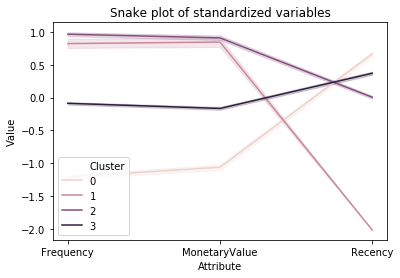

In [339]:
#visualise the snake plot
plt.title ('Snake plot of standardized variables')
sns.lineplot(x = 'Attribute', y= 'Value', hue = 'Cluster', data = datamart_melt);

In [340]:
#calculate relative importance of segment attributes
#the further from zero, the more important the attribute for a segment than to population
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()
population_avg = datamart_rfm.mean()
relative_imp = cluster_avg/ population_avg -1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.80,-0.89,-0.89
1,-0.99,1.51,2.01
2,-0.44,0.88,0.72
3,0.12,-0.54,-0.65


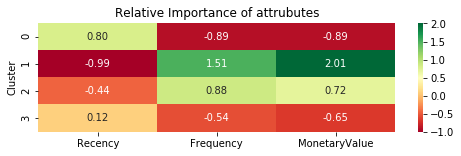

In [341]:
plt.figure(figsize = (8,2))
plt.title('Relative Importance of attrubutes')
sns.heatmap(data = relative_imp, annot = True, fmt = '.2f', cmap = 'RdYlGn')

# Calculate CLV

In [342]:
#calculate retention rate
retention_rate = retention.iloc[:, 1:].mean().mean()

#calculate churn rate
churn_rate = churn.iloc[:, 1:].mean().mean()
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format (retention_rate, churn_rate))

Retention rate: 0.26; Churn rate: 0.74


In [343]:
#CLV = Average Revenue * (Retention Rate / Churn Rate)
#Basic CLV

#Calculate monthly spend per customer
monthly_revenue = df1.groupby(['CustomerID', 'InvoiceMonth'])['TotalSum'].sum()
monthly_revenue = np.mean(monthly_revenue)
lifespan_months = 36
clv_basic = monthly_revenue * lifespan_months
print ('Average basic CLV is {:.1f} USD'. format(clv_basic))

Average basic CLV is 21850.3 USD


In [344]:
#Granular CLV

revenue_per_purchase = df1.groupby(['InvoiceNo'])['TotalSum'].mean().mean()

#calculate number of unique invoices per customer per month
freq = df1.groupby(['CustomerID', 'InvoiceMonth'])['InvoiceNo'].nunique().mean()
lifespan_months = 36
clv_granular = revenue_per_purchase * freq * lifespan_months
print ('Average granular CLV is {:.1f} USD'. format(clv_granular))

Average granulat CLV is 2007.6 USD


In [345]:
#Traditional CLV (customer will not come back if churned once)
monthly_revenue = df1.groupby(['CustomerID', 'InvoiceMonth'])['TotalSum'].sum().mean()
retention_rate = retention.iloc[:, 1:].mean().mean()
churn_rate = 1 - retention_rate
clv_traditional = monthly_revenue * (retention_rate / churn_rate)
print ('Average traditional CLV is {:.1f} USD at {:.1f} % retantion_rate '. format(clv_traditional, retention_rate *100))

Average traditional CLV is 215.3 USD at 26.2 % retantion_rate 
